## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#import data into a dataframe 
df = pd.read_csv('ab_data.csv')

#top 5 rows 
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#calculate number of rows in dataset and display 
row_count= df.shape[0]

#alternatively
df_length = len(df)         
print(df_length)

#Display the count 
print("Number of rows is: {}".format(row_count))

294478
Number of rows is: 294478


c. The number of unique users in the dataset.

In [5]:
#pandas function to calculate unique users
user_unique= df.nunique()['user_id']
#OR
len(df.user_id.unique())

#Display the number 
print("Number of unique users is : {}".format(user_unique))

Number of unique users is : 290584


d. The proportion of users converted.

In [7]:
#since values are 0 and 1 we can take mean to find proportions
#print(df.converted.sum()/df_length)
print("Converted users proportion is {}%".format((df['converted'].mean())*100))

0.119659193556
Converted users proportion is 11.96591935560551%


e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
# group 1 for users with treatment landing on incorrect old page 
grp1 = df.query("group == 'treatment' and landing_page == 'old_page'")
print("Times treatment group user lands incorrectly on old_page is {}".format(len(grp1)))

#users of control gorup incorrectly landing on new page 
grp2 = df.query("group == 'control' and landing_page == 'new_page'")
print("Times control group user incorrectly lands on new_page is {}".format(len(grp2)))

#total number of times the new_page and treatment dont line up 
print("Times new_page and treatment don't line up is {}".format(len(grp1) + len(grp2)))

Times treatment group user lands incorrectly on old_page is 1965
Times control group user incorrectly lands on new_page is 1928
Times new_page and treatment don't line up is 3893


f. Do any of the rows have missing values?

In [10]:
#inspecting the data set 
df.info()

df.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


False

No missing values found 

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [15]:
# Delete Rows
# drop rows for mismatched treatment groups
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)
# drop rows for mismatched control groups
df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [19]:
# save new cleaned dataset with no duplicates or records with missing or mismatched values
# we will use this dataset in next sections
df.to_csv('ab_edited.csv', index=False)

In [22]:
# read newly created dataset into another dataframe
df2 = pd.read_csv('ab_edited.csv')
df2.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [23]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [ ]:
#inspecting df2
df2.info()


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [18]:
# Find unique users
print("Unique users:", len(df2.user_id.unique()))

# Find non unique users
print("Non-unique users:", len(df2)-len(df2.user_id.unique()))

Unique users: 290584
Non-unique users: 1


b. There is one **user_id** repeated in **df2**.  What is it?

In [19]:
#checking duplicated ids
sum(df2['user_id'].duplicated())
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

#Display duplicated user
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [27]:
#details of duplicated row
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [24]:
# Drop duplicated user
df2.drop(labels=1876, axis=0, inplace=True)


In [25]:
# Check if the row deleted or drop worked
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [26]:
#checking if duplicated column is deleted or not 
len(df['user_id'].unique())

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [30]:
#since values are 0s and 1s we can take the mean of the converted column to find the probability
print("Probability of user converting:", df2['converted'].mean())


Probability of user converting: 0.119597498821


In [31]:
# we can make use of groupby function to group the diff types of groups and find mean of each group's converted column to find the 
#probability of each type of group 

df_grp= df.groupby('group')
df_grp.describe()

converted                                                user_id  \
              count      mean       std  min  25%  50%  75%  max     count   
group                                                                        
control    145274.0  0.120386  0.325414  0.0  0.0  0.0  0.0  1.0  145274.0   
treatment  145311.0  0.118807  0.323563  0.0  0.0  0.0  0.0  1.0  145311.0   

                                                                      \
                    mean           std       min       25%       50%   
group                                                                  
control    788164.072594  91287.914601  630002.0  709279.5  788128.5   
treatment  787845.618446  91161.258854  630000.0  708746.5  787874.0   

                                
                 75%       max  
group                           
control    867208.25  945998.0  
treatment  866718.50  945999.0

b. Given that an individual was in the `control` group, what is the probability they converted?

In [32]:
# Probability of control group converting
print("Probability of control group converting:", 
      df2[df2['group']=='control']['converted'].mean())

Probability of control group converting: 0.120387133191


For individual thus from above statement we can say the probability of control group getting converted is 0.120386 and treatment group getting converted is 0.118807

c. Given that an individual was in the `treatment` group, what is the probability they converted?

d. What is the probability that an individual received the new page?

In [34]:
# C.Given individual in treatment probability of their conversion 
print("Probability of treatment group converting:", df2[df2['group']=='treatment']['converted'].mean())

# D. number of individuals who got new page is same as those in treatment group
new_users = len(df.query("group == 'treatment'"))

# calculate total number of users
users=df.shape[0]

# thus, probability that an individual received the new page is new_user/users
new_user_p = new_users/users
print("Probability that an individual reveiced new page is :",new_user_p)

Probability of treatment group converting: 0.118808065515
Probability that an individual reveiced new page is : 0.5000636646764286


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

##### Analysis:
According to the above analysis , given the probabilities, the control group (the one with old page) converted at higher rate than the treatment group(the one with new page).
Treatment group probability is 0.118807
control group probability is 0.120386
The treatment group does better than control by a thin margin. So we cant certainly assert that this one page leads to more conversions.Almost similar performances are noticed. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null-hypothesis**

H0:pnew−pold≤0

i.e. The null hypothesis states that the difference between the population conversion rate of users given the new page and the old page will be equal to zero (the same) or lower than zero (the old page has a higher population conversion rate).

**Alternative-hypothesis**

H1:pnew−pold>0

i.e. The alternative hypothesis states that the difference between the population conversion rate of users given the new page and the old page will be greater than zero to zero (the new page has a higher population conversion rate).

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [55]:
#Since given that under null hypothesis, pnew=pold which are equal to the converted rate in ab_data.csv regardless of the page
pnew = df2['converted'].mean()
print(pnew)
#OR
# Calculate real probability of conversion for new page
p_new = df2[df2['landing_page']=='new_page']['converted'].mean()
print(" Actual values of Probability of conversion for new page (p_new):", p_new)

0.119597498821
 Actual values of Probability of conversion for new page (p_new): 0.118808065515


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [56]:
p_old = df2['converted'].mean()
print(p_old)
#OR
#calculating the real probability of conversion for old page 
p_old = df2[df2['landing_page']=='old_page']['converted'].mean()
print("Actual values of Probability of conversion for old page (p_old):", p_old)

0.119597498821
Actual values of Probability of conversion for old page (p_old): 0.120387133191


In [40]:
# Take the mean of these two probabilities
p_mean = np.mean([p_new, p_old])

print("Probability of conversion udner null hypothesis (p_mean):", p_mean)

Probability of conversion udner null hypothesis (p_mean): 0.119597599353


c. What is $n_{new}$?

In [41]:
n_new = len(df2.query("group == 'treatment'"))
print(n_new)

145310


d. What is $n_{old}$?

In [42]:
n_old = len(df2.query("group == 'control'"))
print(n_old)

145273


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [43]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[pnew, (1-pnew)])
# print(len(new_page_converted)) 
new_page_converted.mean()

0.11979216846741449

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [44]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
# print(len(old_page_converted)) 
old_page_converted.mean()

0.11943719755219483

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [48]:
# Calculate difference in p under the null hypothesis
p_diff=new_page_converted.mean()-old_page_converted.mean()
p_diff

0.0003640056913312012

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

Here,value of  size is different for n_new and n_old. So,calculating difference throws an error. Hence, we use mean function for both old and new page conversion simulations to overcome this problem of shape difference. We are still using probabilities as previous case.

In [49]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[pnew, (1-pnew)]).mean()
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)]).mean()
    p_diff = new_page_converted - old_page_converted 
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

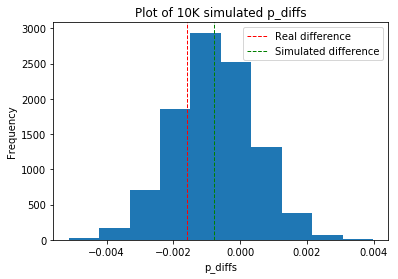

In [51]:
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Plot of 10K simulated p_diffs');
plt.axvline(x=(p_new-p_old), color='r', linestyle='dashed', linewidth=1, label="Real difference")
plt.axvline(x=(np.array(p_diffs).mean()), color='g', linestyle='dashed', linewidth=1, label="Simulated difference")
plt.legend()
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [57]:
# compute actual difference from original dataset ab_data.csv
Actual_diff = df[df['group'] == 'treatment']['converted'].mean() -  df[df['group'] == 'control']['converted'].mean()
Actual_diff 

#p_diff=p_new-p_old
#p_diff

-0.0015790565976871451

In [60]:
p_diffs = np.array(p_diffs)
p_diffs

array([  8.22921933e-04,  -9.04722839e-04,   5.68237809e-04, ...,
        -2.33917526e-05,   1.05023470e-03,  -1.02149676e-03])

In [61]:
# proportion of p_diffs greater than the actual difference observed in ab_data.csv is computed as:
(Actual_diff < p_diffs).mean()

0.74829999999999997

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Analysis**
Here we are calculating the p-values. Here we find the probability of observing our statistic if null hypothesis is true.
The changes from old page and new page are not much significant hence the conversion is not an advantage 
 However, we calculate that almost 74% of the population in our simulated sample lies above the real difference which does not only suggest that the new page does not do significantly better than the old page, it might even be worse!


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [62]:
import statsmodels.api as sm

df2.head(5) 

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [65]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

print("convert_old:", convert_old, 
      "\nconvert_new:", convert_new,
      "\nn_old:", n_old,
      "\nn_new:", n_new)

convert_old: 17489 
convert_new: 17264 
n_old: 145273 
n_new: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [66]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

print("z-score:", z_score,
     "\np-value:", p_value)

1.31160832119 0.905173838025
z-score: 1.31160832119 
p-value: 0.905173838025


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [60]:
from scipy.stats import norm

print(norm.cdf(z_score))
# Tells us how significant our z-score is

# for our single-sides test, assumed at 95% confidence level, we calculate: 
print(norm.ppf(1-(0.05)))
# Tells us what our critical value at 95% confidence is 
# Here, we take the 95% values as specified in PartII.1

0.905058312759
1.64485362695


**Put your answer here.**

Simply put, a z-score is the number of standard deviations from the mean a data point is. But more technically it’s a measure of how many standard deviations below or above the population mean a raw score is.

We find that the z-score of 1.31092419842 is less than the critical value of 1.64485362695. 
So, we can accept the null hypothesis.
the conversion rates of the old and new pages, we find that old pages are only minutely better than new pages.
These values agree with the findings in parts j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression.**

Will likely use sm module

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [67]:
df3 = df2 

In [73]:
df['intercept']=1

df3['ab_page'] = pd.Series(np.zeros(len(df3)), index=df3.index)

df3[['control', 'treatment']] = pd.get_dummies(df['group'])

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [74]:
import statsmodels.api as sm
logit = sm.Logit(df['converted'],df[['intercept','treatment']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [75]:
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Mon, 16 Jul 2018   Pseudo R-squ.:               8.085e-06
Time:                        05:58:33   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

Apparently the p value associated with the ab_page is 0.190 which is slightly lower than the p value calculated in z test.However this p value cant be a reason to reject a null hypothesis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Answer: Basically a regression's outcome depends on major factors that influence. Key factors that contribute to the slope of the line. Small factors such as other things(factors) that have lesser significance(influence) does not account for the slope of the regression and can be left for intercept. 

Generally there would be one major feature that would influence a user to convert . A couple of other small features wouldnt hurt, but too many other things are unnecessary in determining the influences. 

In case of linear regression, the corrected Rsquared values will give less outputs to the unnecessary features, so a few can be considered not many. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [76]:
countries_df = pd.read_csv('./countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [77]:
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,control,treatment
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0.0,0.0,0.0,1.0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0.0,0.0,0.0,1.0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0.0,0.0,1.0,0.0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0.0,0.0,0.0,1.0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0.0,0.0,0.0,1.0


In [78]:
df_new['country'].value_counts()

US    203618
UK     72466
CA     14499
Name: country, dtype: int64

In [79]:
### Creating the necessary dummy variables
df_new[['CA', 'US']] = pd.get_dummies(df_new['country'])[['CA','US']]

df_new['country'].astype(str).value_counts()

US    203618
UK     72466
CA     14499
Name: country, dtype: int64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [80]:
### Fit Your Linear Model And Obtain the Results
df['intercept'] = 1


log_mod = sm.Logit(df_new['converted'], df_new[['CA', 'US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.447175
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            1
Date:                Mon, 16 Jul 2018   Pseudo R-squ.:                 -0.2214
Time:                        06:13:23   Log-Likelihood:            -1.2994e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CA            -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US            -1.9967      0.007   -292.314      0.000      -2.010      -1.983
==============================================================================
"""

In [81]:
np.exp(results.params)

CA    0.130350
US    0.135779
dtype: float64

In [82]:
1/_

0.00010001000100010001

In [83]:
df.groupby('group').mean()['converted']

group
control      0.120386
treatment    0.118807
Name: converted, dtype: float64

### conclusions from Regression

From the logistic regression model too, it is observed that the conversion rates did not have a significant or considerable amount of difference and the influence of countries.
This indicates we should accept null hypothesis and maintain the existing page. 


## Conclusions

The performance of the old page was slightly better compared to the new page. 

Although there can be seen some difference in the conversion rates of old and new pages, the histogram shows that the new page might perform worse than the new page . 

There is no significant evidence to reject null hypothesis . Also the countries did not have any influence in conversion rates, US and UK had similar values .

Hence we accept Null Hypothesis and Reject Alternate Hypothesis. 

It is recommended that the e-commerce company maintains the same page and improve it instead of trying new page . 


## Resources
Udacity Nanodegree Videos and Resources, including Links in this .ipynb

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html

https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python

https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

https://youtu.be/7FTp9JJ5DfE : Project Walkthrough Link on Slack's Project Thread

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [84]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0